In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
netflix = pd.read_csv("../input/netflix-shows/netflix_titles.csv")

In [3]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
netflix.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [5]:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
netflix.director.fillna(value="unknown", inplace = True)
netflix.director

0       Kirsten Johnson
1               unknown
2       Julien Leclercq
3               unknown
4               unknown
             ...       
8802      David Fincher
8803            unknown
8804    Ruben Fleischer
8805       Peter Hewitt
8806        Mozez Singh
Name: director, Length: 8807, dtype: object

In [7]:
netflix.cast.fillna(value = "unknown", inplace = True)
netflix.cast

0                                                 unknown
1       Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...
2       Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...
3                                                 unknown
4       Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...
                              ...                        
8802    Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...
8803                                              unknown
8804    Jesse Eisenberg, Woody Harrelson, Emma Stone, ...
8805    Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...
8806    Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...
Name: cast, Length: 8807, dtype: object

In [8]:
netflix.country.fillna(value="unknown", inplace =True)
netflix.country

0       United States
1        South Africa
2             unknown
3             unknown
4               India
            ...      
8802    United States
8803          unknown
8804    United States
8805    United States
8806            India
Name: country, Length: 8807, dtype: object

In [9]:
netflix.date_added.fillna(value = "unknown", inplace = True)
netflix.date_added

0       September 25, 2021
1       September 24, 2021
2       September 24, 2021
3       September 24, 2021
4       September 24, 2021
               ...        
8802     November 20, 2019
8803          July 1, 2019
8804      November 1, 2019
8805      January 11, 2020
8806         March 2, 2019
Name: date_added, Length: 8807, dtype: object

In [10]:
netflix.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          4
duration        3
listed_in       0
description     0
dtype: int64

In [11]:
netflix.dropna(inplace = True)

In [12]:
netflix.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

# Type

In [13]:
netflix.type.value_counts().index

Index(['Movie', 'TV Show'], dtype='object')

In [14]:
netflix.type.unique

<bound method Series.unique of 0         Movie
1       TV Show
2       TV Show
3       TV Show
4       TV Show
         ...   
8802      Movie
8803    TV Show
8804      Movie
8805      Movie
8806      Movie
Name: type, Length: 8800, dtype: object>

In [15]:
netflix.type.value_counts()

Movie      6126
TV Show    2674
Name: type, dtype: int64

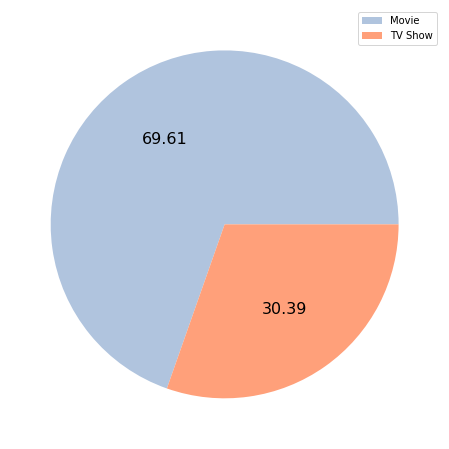

In [16]:
#visualizing the type
plt.figure(figsize=(10,8))

plt.pie(netflix.type.value_counts(), 
        labels = netflix.type.value_counts().index, 
        labeldistance = None, autopct="%.2f", 
        textprops = {'fontsize': 16,}, 
        colors = ['lightsteelblue','lightsalmon' ] )
plt.legend()
plt.show()

Result: The number of movie content on netflix in 2.33 times the TV Shows.

# Release Year

In [17]:
last_decade = netflix[["type", "release_year"]]
last_decade = last_decade.rename(columns = {"release_year" : "Release Year"})
last_decade = last_decade[last_decade["Release Year"]>=2010]
last_decade

,type,Release Year
0,Movie,2020
1,TV Show,2021
2,TV Show,2021
3,TV Show,2021
4,TV Show,2021
...,...,...
8798,Movie,2014
8800,TV Show,2012
8801,Movie,2015
8803,TV Show,2018


In [18]:
last_decade_df = last_decade.groupby("Release Year")["type"].size().reset_index()
last_decade_df = pd.DataFrame(last_decade_df)
last_decade_df

,Release Year,type
0,2010,193
1,2011,185
2,2012,237
3,2013,287
4,2014,352
5,2015,557
6,2016,902
7,2017,1030
8,2018,1147
9,2019,1030


In [19]:
last_decade_df.rename(columns = {"type": "Total Content"}, inplace = True)

In [20]:
last_decade.groupby("Release Year")["type"].value_counts()

Release Year  type   
2010          Movie      153
              TV Show     40
2011          Movie      145
              TV Show     40
2012          Movie      173
              TV Show     64
2013          Movie      225
              TV Show     62
2014          Movie      264
              TV Show     88
2015          Movie      396
              TV Show    161
2016          Movie      658
              TV Show    244
2017          Movie      765
              TV Show    265
2018          Movie      767
              TV Show    380
2019          Movie      633
              TV Show    397
2020          Movie      517
              TV Show    436
2021          TV Show    315
              Movie      277
Name: type, dtype: int64

''

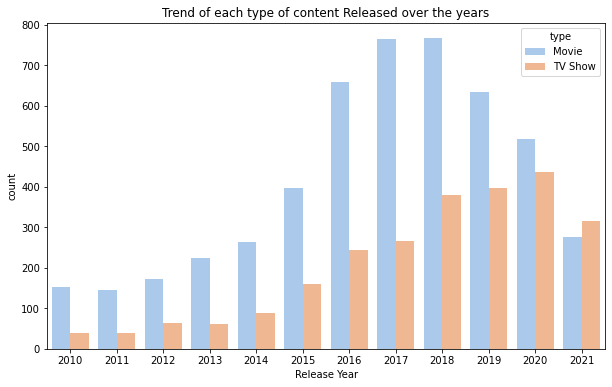

In [21]:
plt.figure(figsize = (10,6))
count_plot = sns.countplot(x = "Release Year", data = last_decade, hue="type",
             palette= "pastel")
count_plot.set(title = "Trend of each type of content Released over the years")
;

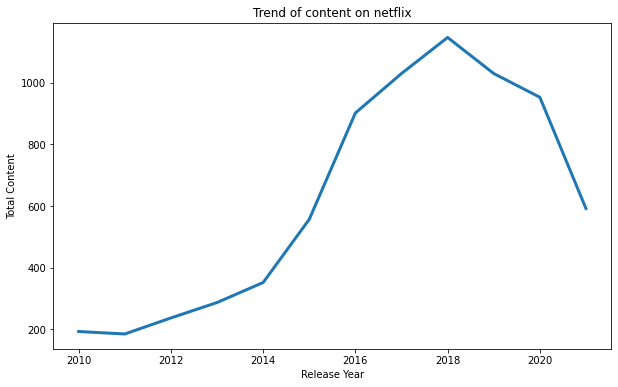

In [22]:
plt.figure(figsize = (10,6))
plot_total_content= sns.lineplot(x= "Release Year", y = "Total Content", data = last_decade_df, 
                                linewidth = 3)
plot_total_content.set(xlabel = "Release Year", ylabel = "Total Content", 
                      title = "Trend of content on netflix")
plt.show()

Result: It is seen that most content on netflix was released in year 2018, the amount of content is decreasing since then.

# Countries

In [23]:
top_10_countries= netflix.country.value_counts().head(10)
top_10_countries = pd.DataFrame(top_10_countries)
top_10_countries

,country
United States,2815
India,972
unknown,830
United Kingdom,419
Japan,244
South Korea,199
Canada,181
Spain,145
France,124
Mexico,110


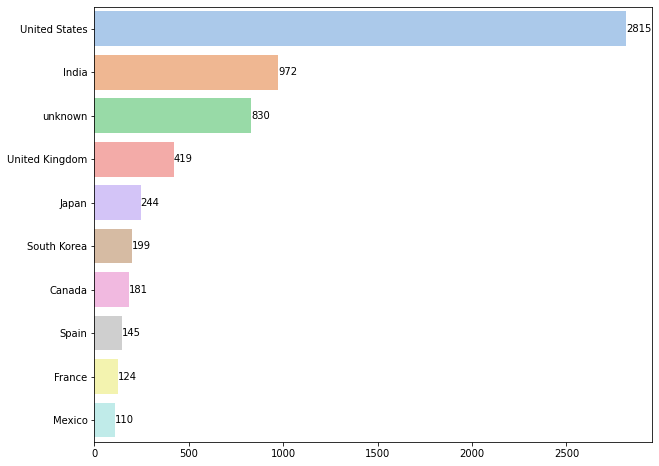

In [24]:
plt.figure(figsize = (10,8))
country_plot = sns.barplot(x = netflix.country.value_counts()[:10].values, 
                           y= netflix.country.value_counts()[:10].index,palette = "pastel")
for i in country_plot.containers:
    country_plot.bar_label(i);  

Result: About 32% of content on Netflix is produced in the USA.

# Rating

In [25]:
netflix.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [26]:
new_catgs = {
    'TV-PG': 'Parental Guidance',
    'TV-MA' : 'Mature Audience',
    'TV-Y7-FV': 'Teens',
    'TV-Y7': 'Teens',
    'TV-14': 'Teens',
    'R': 'Mature Audience',
    'TV-Y': 'General Audience',
    'NR': 'Mature Audience',
    'PG-13': 'Teens',
    'TV-G': 'General Audience',
    'PG': 'Teens',
    'G': 'General Audience',
    'UR': 'Mature Audience',
    'NC-17': 'Mature Audience'
}
netflix['rating']=netflix['rating'].replace(new_catgs)
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,"September 25, 2021",2020,Teens,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,Mature Audience,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown,"September 24, 2021",2021,Mature Audience,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,unknown,unknown,unknown,"September 24, 2021",2021,Mature Audience,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,Mature Audience,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


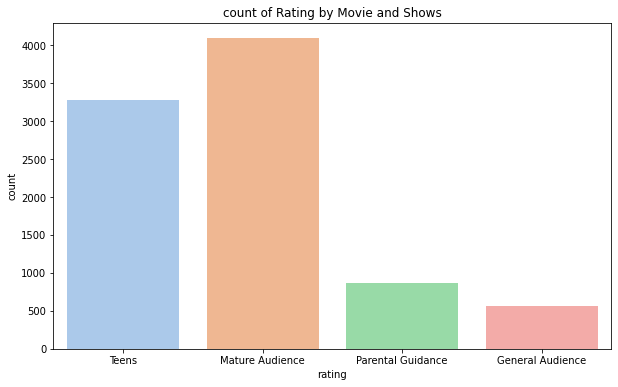

In [27]:
plt.figure(figsize= (10,6))
sns.countplot(x="rating", data=netflix, palette="pastel",)
plt.title("count of Rating by Movie and Shows");

Result: It is seen that Netflix has more content for Mature audience.